In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from scipy import stats
import statistics

In [2]:
# # Load ESM score table
# scoreTableDf = pd.read_csv("random_cog_scores.tsv", header=None, sep='\t')
# scoreTableDf

,0,1,2,3,4,5
0,6,5.57,YP_009325831.1,YP_009950968.1,47.0,70.0
1,5,4.640000000000001,YP_009838200.1,YP_010060169.1,42.0,42.0
2,9,8.419999999999998,YP_006383024.1,YP_009277225.1,216.0,32.0
3,8,7.4799999999999995,ARF09586.1,YP_009904380.1,115.0,76.0
4,8,7.529999999999999,YP_009806319.1,YP_009207280.1,69.0,78.0
...,...,...,...,...,...,...
478511,13,12.500000000000002,YP_006989225.1,YP_009859465.1,175.0,102.0
478512,8,7.46,AEQ33033.1,YP_007676059.1,412.0,208.0
478513,5,4.6899999999999995,YP_010091984.1,YP_009273236.1,86.0,306.0
478514,8,7.479999999999999,YP_009006590.1,YP_009613864.1,80.0,67.0


In [3]:
# # Grab and sanitize the scores
# scores = scoreTableDf[0]
# scores = [int(score) for score in scores if score.isnumeric()] # Filter out bad rows
# scores[:10]

[6, 5, 9, 8, 8, 11, 8, 9, 10, 8]

In [43]:
# Testing with simulated "height" data instead, I'm overwriting scores with simulated data.
# Comment this out to evaluate the ESM data.
scores = np.random.normal(162, 6, 100000)
scores

array([161.12377933, 150.21277859, 162.77744806, ..., 167.33656234,
       161.72135279, 168.953449  ])

In [31]:
random.sample(list(scores), 10)

[161.85810949899454,
 157.64799103091948,
 178.70065161751782,
 155.80875974706464,
 170.20846732700852,
 162.02790941247426,
 167.02702174992862,
 164.64336772195665,
 169.6726556435511,
 164.9788251692143]

In [32]:
def SampleExtremeValue(distr, n):
    return max(random.sample(distr, n))

[SampleExtremeValue([1, 1, 1, 1, 1, 10], 5) for i in range(10)]

[1, 10, 10, 1, 10, 10, 10, 10, 10, 10]

In [33]:
# #n is subsample size, m is number of populations to sample
# def MeanExtremeValue(distr, n, m):
#     return sum([SampleExtremeValue(distr, n) for i in range(m)])/m
# MeanExtremeValue([1, 1, 1, 1, 1, 10], 5, 20)

In [34]:
logss = np.arange(1.0, math.log(10000, 10) + 1, 0.5)
samplesizes = [int(10**logn) for logn in logss]
samplesizes

[10, 31, 100, 316, 1000, 3162, 10000, 31622]

In [35]:
simulation_count = 1000

scores = list(scores)
evs = np.array([[SampleExtremeValue(scores, n) for i in range(simulation_count)] for n in samplesizes])
evs[:, 0:10]

array([[167.80856824, 172.83423162, 173.49243815, 173.43465009,
        173.95289349, 166.2999394 , 176.46294729, 171.09507029,
        163.21724103, 170.49622083],
       [173.70718087, 170.58693836, 168.94745573, 179.74672765,
        170.65852822, 173.27537982, 174.01448001, 176.18360847,
        170.50998252, 170.78704562],
       [179.4841682 , 174.40805642, 176.51204003, 182.97699917,
        184.38866362, 173.99426049, 179.82955985, 178.29211659,
        178.66854081, 173.07139682],
       [179.27986856, 180.93119634, 182.90045841, 183.62231534,
        177.07280946, 178.24798294, 177.23290926, 178.63281504,
        177.61228824, 178.57940498],
       [180.88794889, 183.42218328, 181.90622822, 178.97035765,
        183.33090091, 178.66854081, 181.73624731, 181.72858416,
        181.31905917, 184.38866362],
       [182.19698918, 182.29091967, 187.21476547, 180.28867208,
        183.77125019, 185.3728996 , 185.17735385, 182.59876627,
        183.70706741, 187.21476547],
       [18

In [36]:
kde = stats.gaussian_kde(scores, bw_method=0.5)
mean = statistics.mean(scores)
stddev = statistics.stdev(scores)

ev_kdes = [stats.gaussian_kde(ev, bw_method=0.5) for ev in evs]
ev_means = [statistics.mean(ev) for ev in evs]
ev_stddevs = [statistics.stdev(ev) for ev in evs]

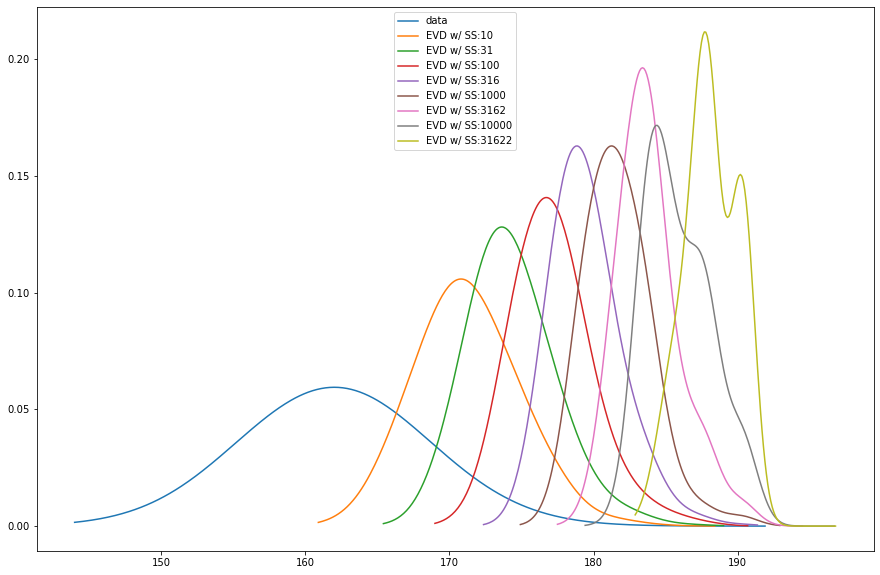

In [37]:
def PlotKDE(kde, mean, stddev, label):
    x_axis = np.arange(mean - 3*stddev, mean + 5*stddev, 0.1)
    y_axis = kde.pdf(x_axis)
    plt.plot(x_axis, y_axis, label=label)
    
plt.rcParams["figure.figsize"] = (15,10)

# Plot the original distribution
PlotKDE(kde, mean, stddev, "data")

# Plot the EVDs with different sample size
for i in range(len(evs)):
    PlotKDE(ev_kdes[i], ev_means[i], ev_stddevs[i], f"EVD w/ SS:{samplesizes[i]}")
    
plt.legend(loc='upper center')
plt.show()

In [38]:
# Quantify the likelihood of obtaining a result at least as large from a given sample size. 
# This is 1-CDF(x)
def Likelihood(distr, value, min_bound = -10):
    return 1.0 - distr.integrate_box_1d(min_bound, value)
# Test on original data (not EVs)
Likelihood(kde, 165)

0.32633613646030646

In [41]:
#test_scores = [30, 60, 120, 180] # this is for comparing against ESM data
test_scores = [175, 180, 185, 190] # this is for heights data
test_likelihoods = [[Likelihood(kde, score) for kde in ev_kdes] for score in test_scores]
test_likelihoods

[[0.16224184051155655,
  0.38501432213439046,
  0.7571006312517392,
  0.9748631053548578,
  0.999663171138108,
  0.9999997878427344,
  0.9999999999959496,
  1.0],
 [0.016148955264812637,
  0.05213994449571835,
  0.15640257601004104,
  0.3833350295415673,
  0.7402675132664294,
  0.9707700960669575,
  0.9994720004848889,
  0.9999999494195158],
 [0.0007095441206316222,
  0.003940720469099324,
  0.015622941903079779,
  0.032547077385282064,
  0.08855564665192006,
  0.2664212669942372,
  0.5899448615741608,
  0.937948290164382],
 [5.875084800877062e-07,
  3.923852829346153e-05,
  0.00022824949385280568,
  0.0014232506669434875,
  0.007197534155718444,
  0.017181171423415686,
  0.06558323293965507,
  0.20412459689381346]]

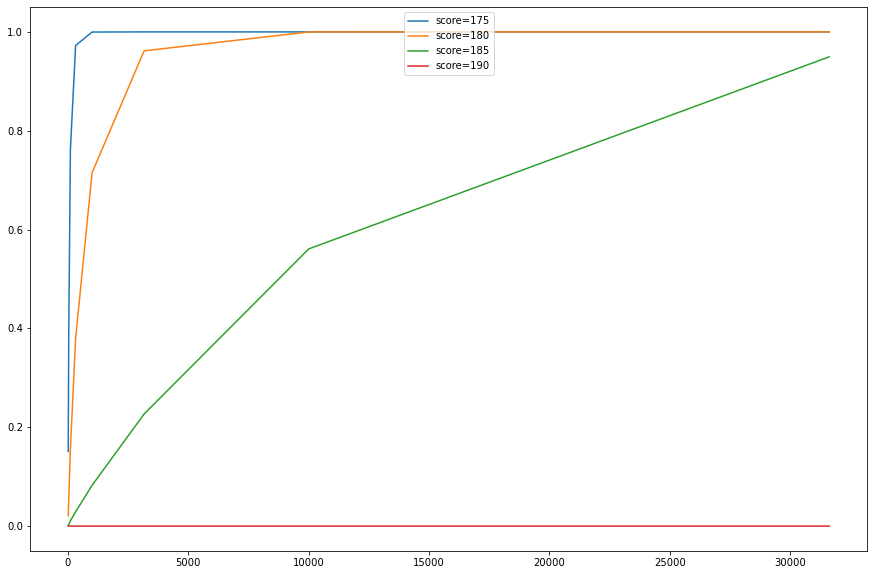

In [42]:
for i in range(len(test_scores)):
    plt.plot(samplesizes, evalues[i], label=f"score={test_scores[i]}")
plt.legend(loc='upper center')
plt.show()